# Multiple Linear Regression

## Bike Sharing - Demand Prediction

### Problem Statement

A bike-sharing provider has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. In such an attempt, the company aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends. 


The company wants to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
- Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
Bike Demand has to be modelled with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Steps for Model Building
1. Reading and Understanding Data  
2. Visualising the Data  
3. Data Preparation  
4. Splitting the Data into Training and Testing Sets  
5. Feature Scaling on the train data 
6. Building the Model  
7. Residual Analysis of the train data  
8. Making predictions using final model  
9. Model Evaluation

## Step 1: Reading and Understanding the Data

### Importing Required Libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import calendar # to get the months name

### Reading Data

In [2]:
## reading data
bikeDF = pd.read_csv('day.csv')
bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Understanding Data

In [3]:
# Checking shape of the bike data
bikeDF.shape

(730, 16)

In [4]:
# getting info on the data frame
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
# Checking for null data
bikeDF.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# checking the spread of data and SD, Mean, Median and mode
bikeDF.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# checking the number of unique values in all columns
bikeDF.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

As we can see season, yr, mnth, holiday, weekday, workingday and weathersit are categorical data and others are continuous data

In [8]:
# getting uniques value list for the categorical data
catVars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in range(len(catVars)):
    print("The uniques Value for {0} : {1}".format(catVars[i], bikeDF[catVars[i]].unique()))

The uniques Value for season : [1 2 3 4]
The uniques Value for yr : [0 1]
The uniques Value for mnth : [ 1  2  3  4  5  6  7  8  9 10 11 12]
The uniques Value for holiday : [0 1]
The uniques Value for weekday : [6 0 1 2 3 4 5]
The uniques Value for workingday : [0 1]
The uniques Value for weathersit : [2 1 3]


### Checking Correlaton of numerical data

In [9]:
# getting the correlation data on Numerical data
bikeDF.corr()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.000023,-0.004619,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.000023,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.059978,0.057427,0.067534
workingday,-0.004619,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,-0.517607,0.305437,0.062542
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


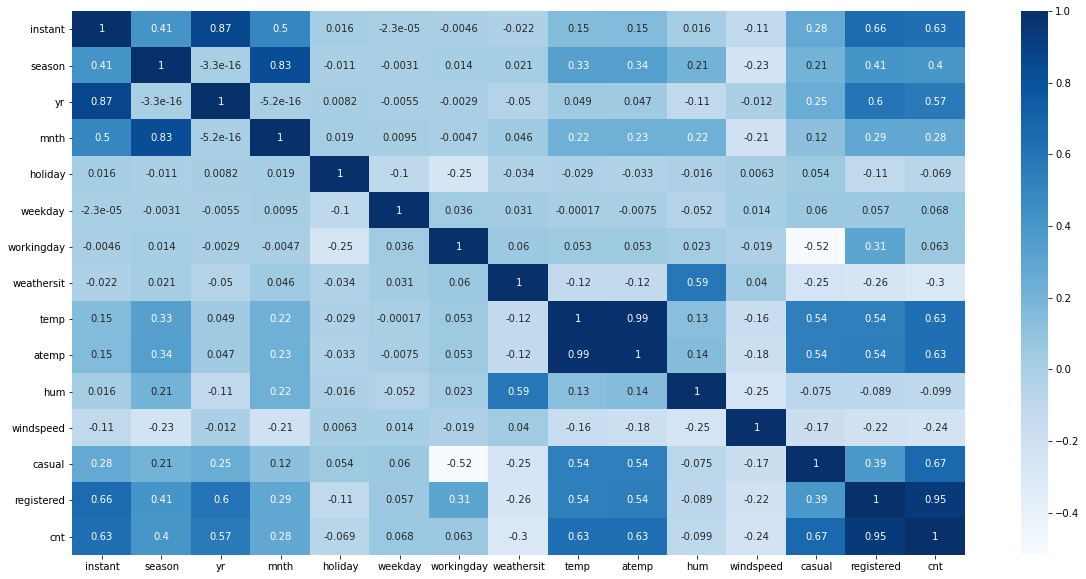

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(bikeDF.corr(), annot = True, cmap="Blues")
plt.show()

From the HeatMap, we can check that the features temp, atemp, yr, season, weathersit, mnth, windspeed have high correlation with the dependent variable 'cnt'. Windspeed and Weathersit have negative correlation with 'cnt'.

### Updating Categorical Data with Proper Values

1. mnth - [janaury, february, march, april, may, june, july, august, spetember, october, november, december]
2. season - [spring, summer, fall, winter]
3. weathersit - ['Clear', 'Mist & Cloudy', 'Light Snow & Rain', 'Heavy Snow & Rain']
4. weekday - [sunday, moday, tuesday, wednesday, thursday, friday, saturday]

In [11]:
# Converting categorical data to meaningful values
bikeDF['mnth'] = bikeDF.mnth.map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July', 8:'August',9:'September',10:'October',11:'November',12:'December'})
bikeDF.season = bikeDF.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})
bikeDF.weathersit = bikeDF.weathersit.map({1:'Clear',2:'Mist_Cloudy', 
                                             3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'})
bikeDF.weekday = bikeDF.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",
                                     4:"Thrusday",5:"Friday",6:"Saturday"})

bikeDF.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


## Step 2: Visualising Data

### Visualising Numerical Data


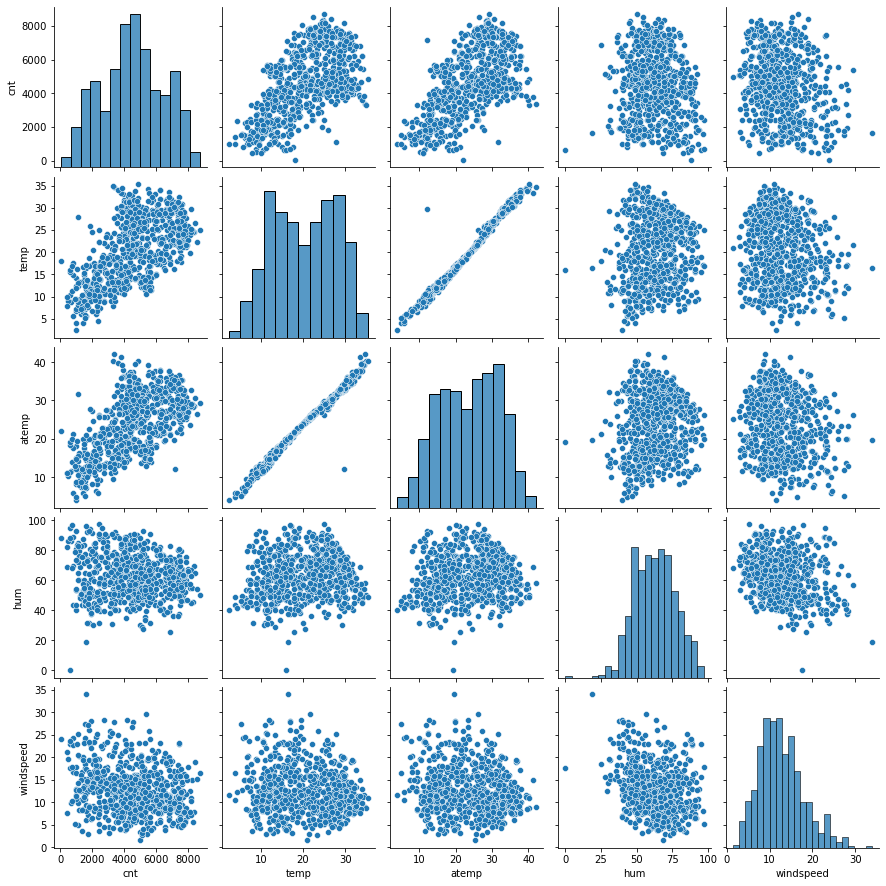

In [12]:
sns.pairplot(data=bikeDF,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Visualising Categorical Data

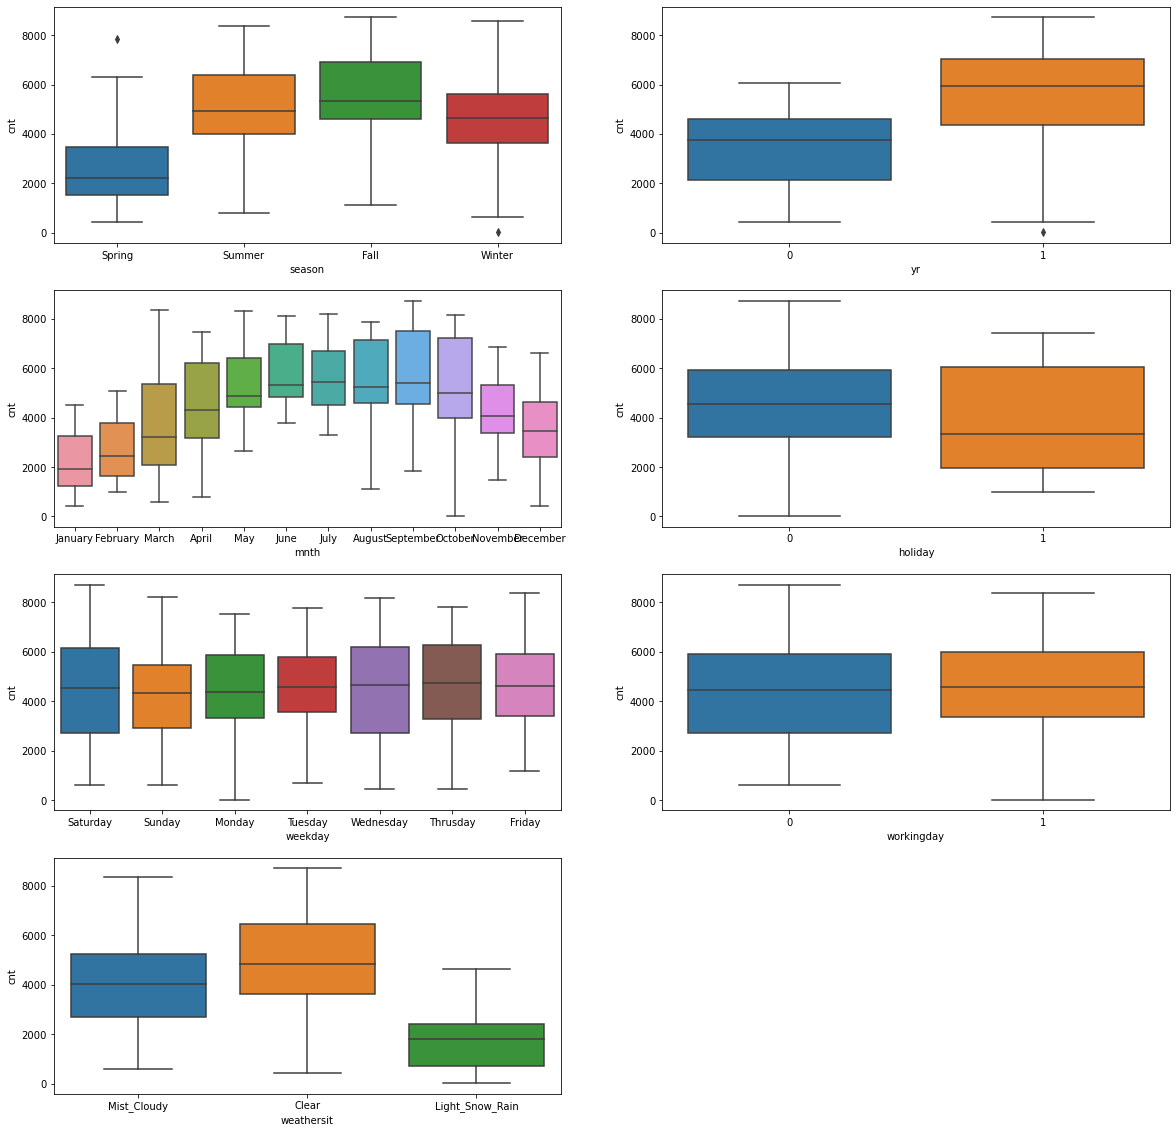

In [13]:
plt.figure(figsize=(20, 20))

catVars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

for i in range(len(catVars)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=catVars[i], y='cnt', data=bikeDF)

Based on the above graphs, we can see that:
1. season - Spring has least demand, while Fall, Summer and Winter has high demands (in same order)
2. yr - There is a very high year on year increase in demand.
3. mnth - May through October has very good demand while January has the lowest demand.
4. holiday - On holidays, the demands are less but variance is more.
5. weathersit - Clear and moderate (mist and cloudy) weathers, the demands are good. the demand is least in Light Snowy and light rain weather. there are no demand on extreme (Heavy Snow & Rain) weather condition.

## Step 3: Data Preparation

### Dropping irrelevant columns

In [14]:
## dropping columns that are irrelevant for the model - 
# 1. instant - it is index for the data, hence not required.
# 2. dteday - it represents date but since we already have the month and yesr and weekday or holiday, it is not required.
# 3. casual - one of dependent variable and 'cnt' provides cummulative data of casual and registered user. So it can be dropped.
# 4. registered - one of dependent variable and 'cnt' provides cummulative data of casual and registered user. So it can be dropped.

bikeDF.drop(['instant','dteday','casual','registered'],axis = 1,inplace = True)
bikeDF.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Saturday,0,Mist_Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Sunday,0,Mist_Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


### Creating Dummy Variables for categorical data

In [15]:
# creating dummy variables for "season","mnth","weekday","weathersit"
bikeDF = pd.get_dummies(data=bikeDF,columns=["season","mnth","weekday","weathersit"],drop_first=True)
bikeDF.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   yr                          730 non-null    int64  
 1   holiday                     730 non-null    int64  
 2   workingday                  730 non-null    int64  
 3   temp                        730 non-null    float64
 4   atemp                       730 non-null    float64
 5   hum                         730 non-null    float64
 6   windspeed                   730 non-null    float64
 7   cnt                         730 non-null    int64  
 8   season_Spring               730 non-null    uint8  
 9   season_Summer               730 non-null    uint8  
 10  season_Winter               730 non-null    uint8  
 11  mnth_August                 730 non-null    uint8  
 12  mnth_December               730 non-null    uint8  
 13  mnth_February               730 non

## Step 4: Splitting data into Training and Testing Sets

### Train - Test Split
The data is split into Train sets and Test sets in the ratio of 70:30. The random_state is kept at 25. Random state ensures that the splits that you generate are reproducible. Scikit-learn uses random permutations to generate the splits. The random state that you provide is used as a seed to the random number generator. This ensures that the random numbers are generated in the same order.

In [17]:
train, test = train_test_split(bikeDF, train_size = 0.7, test_size = 0.3, random_state = 25)

In [18]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,1,25.556653,28.25335,87.2500,23.958329,4073,0,0,...,0,1,0,0,0,0,1,0,0,1
698,1,0,1,12.231653,16.19335,64.9583,3.917544,5668,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,23.062500,26.80000,86.7083,10.249593,4553,0,1,...,0,0,0,0,1,0,0,0,0,1
528,1,0,1,26.889153,30.55585,58.2083,22.999693,7421,0,1,...,0,0,0,0,0,0,0,1,0,0
722,1,0,1,9.483464,12.94500,79.1304,5.174437,920,1,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
train.shape

(510, 30)

In [20]:
test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
637,1,0,0,21.593347,25.88315,58.3333,9.042186,6889,0,0,...,0,1,0,0,1,0,0,0,0,0
305,0,0,1,15.477500,19.50665,71.8750,5.500144,4186,0,0,...,0,0,0,0,0,0,0,1,0,0
606,1,0,1,28.973347,32.63895,59.0417,5.166819,7713,0,0,...,0,0,0,0,0,1,0,0,0,0
580,1,0,0,32.526653,37.56335,61.3333,17.249686,6824,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,0,13.085847,16.06645,62.3750,11.833339,3331,0,0,...,1,0,0,0,1,0,0,0,0,0


In [21]:
test.shape

(219, 30)

## Step 5: Feature Scaling on the Train data

### Rescaling the features using MinMaxScaler

In [22]:
scaler = MinMaxScaler()

# Apply scaler() to 'cnt','hum','windspeed','temp','atemp' columns.
num_vars = ['cnt','hum','windspeed','temp','atemp']

train[num_vars] = scaler.fit_transform(train[num_vars])

In [23]:
train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,1,0.699946,0.628291,0.897172,0.829755,0.466061,0,0,...,0,1,0,0,0,0,1,0,0,1
698,1,0,1,0.268136,0.303249,0.667952,0.042547,0.649563,0,0,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0.619121,0.589120,0.891602,0.291272,0.521284,0,1,...,0,0,0,0,1,0,0,0,0,1
528,1,0,1,0.743127,0.690349,0.598543,0.792100,0.851243,0,1,...,0,0,0,0,0,0,0,1,0,0
722,1,0,1,0.179078,0.215699,0.813680,0.091918,0.103313,1,0,...,0,0,1,0,0,0,0,0,0,1


In [24]:
train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.496078,0.025490,0.711765,0.522582,0.498818,0.651564,0.387718,0.507878,0.250980,0.231373,...,0.088235,0.084314,0.143137,0.133333,0.129412,0.137255,0.160784,0.139216,0.037255,0.349020
std,0.500476,0.157763,0.453386,0.244706,0.221126,0.145399,0.203228,0.225640,0.434003,0.422124,...,0.283915,0.278131,0.350557,0.340268,0.335985,0.344454,0.367693,0.346511,0.189572,0.477128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.304951,0.304082,0.544773,0.240540,0.333439,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.523348,0.510387,0.655313,0.359232,0.513461,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.738975,0.683760,0.750857,0.506967,0.673234,0.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can check from the above table that all the features have been scaled and min and max values are 0 and 1 for all the columns. This, in a way, also handles the outlier if any present in the datasets.

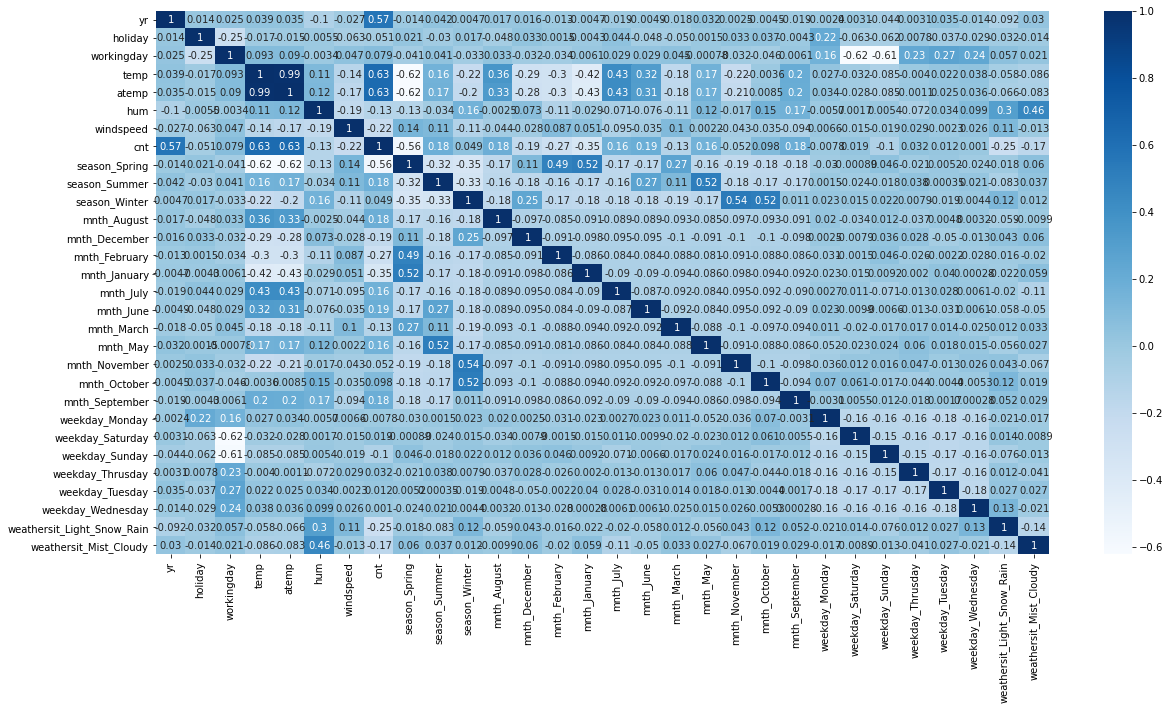

In [25]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True, cmap="Blues")
plt.show()

## Step 6: Building Model Using RFE

### Deriving X and y sets from train

In [26]:
y_train = train.pop('cnt')
X_train = train

In [27]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,1,0.699946,0.628291,0.897172,0.829755,0,0,0,...,0,1,0,0,0,0,1,0,0,1
698,1,0,1,0.268136,0.303249,0.667952,0.042547,0,0,1,...,0,0,0,0,0,0,0,0,0,0
134,0,0,0,0.619121,0.589120,0.891602,0.291272,0,1,0,...,0,0,0,0,1,0,0,0,0,1
528,1,0,1,0.743127,0.690349,0.598543,0.792100,0,1,0,...,0,0,0,0,0,0,0,1,0,0
722,1,0,1,0.179078,0.215699,0.813680,0.091918,1,0,0,...,0,0,1,0,0,0,0,0,0,1


In [28]:
y_train.head()

625    0.466061
698    0.649563
134    0.521284
528    0.851243
722    0.103313
Name: cnt, dtype: float64

### Building RFE model

In [29]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 4),
 ('season_Winter', True, 1),
 ('mnth_August', False, 14),
 ('mnth_December', False, 2),
 ('mnth_February', False, 6),
 ('mnth_January', False, 5),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', False, 9),
 ('mnth_May', False, 13),
 ('mnth_November', True, 1),
 ('mnth_October', False, 10),
 ('mnth_September', False, 3),
 ('weekday_Monday', False, 7),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thrusday', False, 12),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_Light_Snow_Rain', True, 1),
 ('weathersit_Mist_Cloudy', True, 1)]

In [30]:
# Columns selected by RFE. We can start with these columns for manual elimination
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'season_Spring', 'season_Winter', 'mnth_July', 'mnth_November',
       'weekday_Saturday', 'weekday_Sunday', 'weathersit_Light_Snow_Rain',
       'weathersit_Mist_Cloudy'],
      dtype='object')

In [31]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [32]:
X_train_rfe.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Winter,mnth_July,mnth_November,weekday_Saturday,weekday_Sunday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
625,1,0,1,0.699946,0.628291,0.897172,0.829755,0,0,0,0,0,0,0,1
698,1,0,1,0.268136,0.303249,0.667952,0.042547,0,1,0,1,0,0,0,0
134,0,0,0,0.619121,0.589120,0.891602,0.291272,0,0,0,0,0,1,0,1
528,1,0,1,0.743127,0.690349,0.598543,0.792100,0,0,0,0,0,0,0,0
722,1,0,1,0.179078,0.215699,0.813680,0.091918,1,0,0,0,0,0,0,1


### Building 1st model using statsmodel.api

In [33]:
# Adding a constant variable 
 
X_train_sm = sm.add_constant(X_train_rfe)

# Create a first fitted model
lm = sm.OLS(y_train,X_train_sm).fit()
# Print a summary of the linear regression model obtained
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.32e-184
Time:                        23:03:15   Log-Likelihood:                 498.65
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     495   BIC:                            -903.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2582      0.026      9.994      0.000       0.207       0.309
yr                             0.2328      0.008     27.983      0.000       0.216       0.249
holiday                        0.0081      0.022      0.374      0.709      -0.035       0.051
workingday                     0.0901      0.010      9.290      0.000       0.071       0.109
temp                           0.3246      0.121      2.691      0.007       0.088       0.562
atemp                          0.1566      0.132      1.186      0.236      -0.103       0.416
hum                           -0.1589      0.038     -4.154      0.000      -0.234      -0.084
windspeed                     -0.1157      0.022     -5.330      0.000      -0.158      -0.073
season_Spring                 -0.1117      0.016     -7.092      0.000      -0.143      -0.081
season_Winter                  0.0658      0.014      4.856      0.000       0.039       0.092
mnth_July                     -0.0816      0.017     -4.771      0.000      -0.115      -0.048
mnth_November                 -0.0520      0.017     -3.039      0.002      -0.086      -0.018
weekday_Saturday               0.1041      0.012      8.482      0.000       0.080       0.128
weekday_Sunday                 0.0558      0.013      4.468      0.000       0.031       0.080
weathersit_Light_Snow_Rain    -0.2107      0.025     -8.386      0.000      -0.260      -0.161
weathersit_Mist_Cloudy        -0.0588      0.011     -5.498      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       71.149   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.263
Skew:                          -0.697   Prob(JB):                     2.17e-41
Kurtosis:                       5.621   Cond. No.                     1.63e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.2e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Dropping holiday as it has a p-value of 0.709

In [34]:
X_train_new = X_train_rfe.drop(["holiday"], axis = 1)

### Model 2

#### Rebuilding the model without holiday

In [35]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     181.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.32e-184
Time:                        23:03:15   Log-Likelihood:                 498.65
No. Observations:                 510   AIC:                            -967.3
Df Residuals:                     495   BIC:                            -903.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2663      0.041      6.567      0.000       0.187       0.346
yr                             0.2328      0.008     27.983      0.000       0.216       0.249
workingday                     0.0820      0.026      3.126      0.002       0.030       0.134
temp                           0.3246      0.121      2.691      0.007       0.088       0.562
atemp                          0.1566      0.132      1.186      0.236      -0.103       0.416
hum                           -0.1589      0.038     -4.154      0.000      -0.234      -0.084
windspeed                     -0.1157      0.022     -5.330      0.000      -0.158      -0.073
season_Spring                 -0.1117      0.016     -7.092      0.000      -0.143      -0.081
season_Winter                  0.0658      0.014      4.856      0.000       0.039       0.092
mnth_July                     -0.0816      0.017     -4.771      0.000      -0.115      -0.048
mnth_November                 -0.0520      0.017     -3.039      0.002      -0.086      -0.018
weekday_Saturday               0.0959      0.028      3.418      0.001       0.041       0.151
weekday_Sunday                 0.0477      0.028      1.694      0.091      -0.008       0.103
weathersit_Light_Snow_Rain    -0.2107      0.025     -8.386      0.000      -0.260      -0.161
weathersit_Mist_Cloudy        -0.0588      0.011     -5.498      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       71.149   Durbin-Watson:                   1.917
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.263
Skew:                          -0.697   Prob(JB):                     2.17e-41
Kurtosis:                       5.621   Cond. No.                         78.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF values for model 2 features

In [36]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,306.39
2,temp,289.31
4,hum,28.60
1,workingday,18.09
5,windspeed,4.73
10,weekday_Saturday,4.13
11,weekday_Sunday,4.08
6,season_Spring,3.10
7,season_Winter,2.75
13,weathersit_Mist_Cloudy,2.27


##### atemp has high p-value of 0.236 and high VIF value of 306.39. So dropping atemp from the model

In [37]:
X_train_new = X_train_new.drop(["atemp"], axis = 1)

### Model 3

#### Rebuilding the model without atemp.

In [38]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.87e-185
Time:                        23:03:15   Log-Likelihood:                 497.92
No. Observations:                 510   AIC:                            -967.8
Df Residuals:                     496   BIC:                            -908.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2718      0.040      6.741      0.000       0.193       0.351
yr                             0.2325      0.008     27.950      0.000       0.216       0.249
workingday                     0.0822      0.026      3.134      0.002       0.031       0.134
temp                           0.4632      0.030     15.635      0.000       0.405       0.521
hum                           -0.1564      0.038     -4.092      0.000      -0.231      -0.081
windspeed                     -0.1196      0.021     -5.574      0.000      -0.162      -0.077
season_Spring                 -0.1122      0.016     -7.123      0.000      -0.143      -0.081
season_Winter                  0.0667      0.014      4.932      0.000       0.040       0.093
mnth_July                     -0.0806      0.017     -4.719      0.000      -0.114      -0.047
mnth_November                 -0.0520      0.017     -3.039      0.002      -0.086      -0.018
weekday_Saturday               0.0963      0.028      3.431      0.001       0.041       0.151
weekday_Sunday                 0.0477      0.028      1.692      0.091      -0.008       0.103
weathersit_Light_Snow_Rain    -0.2131      0.025     -8.502      0.000      -0.262      -0.164
weathersit_Mist_Cloudy        -0.0591      0.011     -5.526      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       69.160   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.139
Skew:                          -0.679   Prob(JB):                     4.64e-40
Kurtosis:                       5.584   Cond. No.                         24.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF value for Model 3 features

In [39]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.08
1,workingday,17.91
2,temp,15.03
4,windspeed,4.66
9,weekday_Saturday,4.09
10,weekday_Sunday,4.05
5,season_Spring,3.10
6,season_Winter,2.73
12,weathersit_Mist_Cloudy,2.26
0,yr,2.00


##### weekday_Sunday has p-value of 0.091 which is greater than 0.05. So dropping weekday_Sunday from the model feature list and rebuilding the model

In [40]:
X_train_new = X_train_new.drop(["weekday_Sunday"], axis = 1)

### Model 4

#### Rebuilding the Model without weekday_Sunday

In [41]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     210.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.21e-186
Time:                        23:03:15   Log-Likelihood:                 496.46
No. Observations:                 510   AIC:                            -966.9
Df Residuals:                     497   BIC:                            -911.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.3115      0.033      9.484      0.000       0.247       0.376
yr                             0.2321      0.008     27.861      0.000       0.216       0.248
workingday                     0.0425      0.012      3.644      0.000       0.020       0.065
temp                           0.4627      0.030     15.588      0.000       0.404       0.521
hum                           -0.1557      0.038     -4.066      0.000      -0.231      -0.080
windspeed                     -0.1180      0.021     -5.495      0.000      -0.160      -0.076
season_Spring                 -0.1129      0.016     -7.153      0.000      -0.144      -0.082
season_Winter                  0.0665      0.014      4.906      0.000       0.040       0.093
mnth_July                     -0.0823      0.017     -4.819      0.000      -0.116      -0.049
mnth_November                 -0.0528      0.017     -3.079      0.002      -0.086      -0.019
weekday_Saturday               0.0566      0.015      3.676      0.000       0.026       0.087
weathersit_Light_Snow_Rain    -0.2135      0.025     -8.507      0.000      -0.263      -0.164
weathersit_Mist_Cloudy        -0.0592      0.011     -5.526      0.000      -0.080      -0.038
==============================================================================
Omnibus:                       73.032   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.646
Skew:                          -0.719   Prob(JB):                     6.59e-42
Kurtosis:                       5.618   Cond. No.                         20.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking VIF value for Model 4 features

In [42]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,22.17
2,temp,13.92
1,workingday,5.30
4,windspeed,4.19
5,season_Spring,2.85
6,season_Winter,2.67
11,weathersit_Mist_Cloudy,2.20
0,yr,1.99
9,weekday_Saturday,1.78
8,mnth_November,1.60


##### In Model 4, we have p-value 0.000 for most of the fatures and 0.002 for only 1 feature. So we will check the high VIF value for dropping the feature. the column 'hum' as high VIF value of 22.17, So dropping 'hum' from the Model 4

In [43]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

### Model 5

#### Rebuilding the model without 'hum' feature

In [44]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     221.2
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.13e-183
Time:                        23:03:16   Log-Likelihood:                 488.11
No. Observations:                 510   AIC:                            -952.2
Df Residuals:                     498   BIC:                            -901.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2239      0.025      8.890      0.000       0.174       0.273
yr                             0.2365      0.008     28.192      0.000       0.220       0.253
workingday                     0.0454      0.012      3.840      0.000       0.022       0.069
temp                           0.4367      0.029     14.836      0.000       0.379       0.495
windspeed                     -0.0973      0.021     -4.592      0.000      -0.139      -0.056
season_Spring                 -0.1171      0.016     -7.322      0.000      -0.148      -0.086
season_Winter                  0.0571      0.014      4.214      0.000       0.031       0.084
mnth_July                     -0.0739      0.017     -4.293      0.000      -0.108      -0.040
mnth_November                 -0.0498      0.017     -2.862      0.004      -0.084      -0.016
weekday_Saturday               0.0585      0.016      3.748      0.000       0.028       0.089
weathersit_Light_Snow_Rain    -0.2594      0.023    -11.393      0.000      -0.304      -0.215
weathersit_Mist_Cloudy        -0.0839      0.009     -9.374      0.000      -0.102      -0.066
==============================================================================
Omnibus:                       73.615   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.718
Skew:                          -0.722   Prob(JB):                     1.42e-42
Kurtosis:                       5.643   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF values for model 5 features

In [45]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.98
1,workingday,5.15
3,windspeed,4.16
5,season_Winter,2.09
0,yr,1.99
4,season_Spring,1.89
8,weekday_Saturday,1.73
7,mnth_November,1.59
10,weathersit_Mist_Cloudy,1.58
6,mnth_July,1.35


##### Based on the model 5 VIF values, 'temp' and 'workingday' has values more than 5 (5.98 and 5.15 respectively). Based on our initial analysis, we found that 'temp' has a correlation 63% with 'cnt' and 'workingday' has correlation of 6.3%. Hence, it makes more sense to drop 'workingday' and check the VIF again.

In [46]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

### Model 6

#### Rebuilding the model after dropping 'workingday'

In [47]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     235.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          9.99e-182
Time:                        23:03:16   Log-Likelihood:                 480.67
No. Observations:                 510   AIC:                            -939.3
Df Residuals:                     499   BIC:                            -892.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2547      0.024     10.524      0.000       0.207       0.302
yr                             0.2378      0.008     27.985      0.000       0.221       0.254
temp                           0.4432      0.030     14.880      0.000       0.385       0.502
windspeed                     -0.0931      0.021     -4.338      0.000      -0.135      -0.051
season_Spring                 -0.1171      0.016     -7.228      0.000      -0.149      -0.085
season_Winter                  0.0567      0.014      4.125      0.000       0.030       0.084
mnth_July                     -0.0731      0.017     -4.189      0.000      -0.107      -0.039
mnth_November                 -0.0499      0.018     -2.827      0.005      -0.084      -0.015
weekday_Saturday               0.0214      0.012      1.722      0.086      -0.003       0.046
weathersit_Light_Snow_Rain    -0.2514      0.023    -10.937      0.000      -0.297      -0.206
weathersit_Mist_Cloudy        -0.0825      0.009     -9.096      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       79.961   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.668
Skew:                          -0.810   Prob(JB):                     1.45e-42
Kurtosis:                       5.538   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF values for model 6 features

In [48]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.17
2,windspeed,3.98
4,season_Winter,2.02
0,yr,1.97
3,season_Spring,1.69
6,mnth_November,1.59
9,weathersit_Mist_Cloudy,1.56
5,mnth_July,1.35
7,weekday_Saturday,1.14
8,weathersit_Light_Snow_Rain,1.10


##### We have 'weekday_Saturday' which has a p-value of 0.086, which is more than 0.05. Hence dropping 'weekday_Saturday' from the model

In [49]:
X_train_new = X_train_new.drop(["weekday_Saturday"], axis = 1)

### Model 7

#### Rebuilding the model without 'weekday_Saturday' 

In [50]:
# Adding a constant variable 
X_train_lm = sm.add_constant(X_train_new)
lm = sm.OLS(y_train,X_train_lm).fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          2.63e-182
Time:                        23:03:16   Log-Likelihood:                 479.16
No. Observations:                 510   AIC:                            -938.3
Df Residuals:                     500   BIC:                            -896.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2594      0.024     10.764      0.000       0.212       0.307
yr                             0.2379      0.009     27.943      0.000       0.221       0.255
temp                           0.4407      0.030     14.783      0.000       0.382       0.499
windspeed                     -0.0938      0.021     -4.364      0.000      -0.136      -0.052
season_Spring                 -0.1180      0.016     -7.270      0.000      -0.150      -0.086
season_Winter                  0.0564      0.014      4.098      0.000       0.029       0.083
mnth_July                     -0.0722      0.017     -4.132      0.000      -0.107      -0.038
mnth_November                 -0.0500      0.018     -2.831      0.005      -0.085      -0.015
weathersit_Light_Snow_Rain    -0.2509      0.023    -10.895      0.000      -0.296      -0.206
weathersit_Mist_Cloudy        -0.0826      0.009     -9.092      0.000      -0.100      -0.065
==============================================================================
Omnibus:                       75.316   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.939
Skew:                          -0.751   Prob(JB):                     5.69e-42
Kurtosis:                       5.585   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking the VIF value of model 7 features

In [51]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.13
2,windspeed,3.98
4,season_Winter,2.01
0,yr,1.97
3,season_Spring,1.68
6,mnth_November,1.59
8,weathersit_Mist_Cloudy,1.56
5,mnth_July,1.35
7,weathersit_Light_Snow_Rain,1.10


##### Now we do NOT have any such features for which p-value is more than 0.05 and VIF value greater than 5. The r-Squared value if 0.824 and adjusted R-Squared value is 0.821. This seems to be a good model for predicting demand for bikes. We can treat Model 7 as our final model.

##### The key features of this model are as follows:
- The low or near zero value of p-value (< 0.05) shows that the null hypothesis is rejected. Rejecting the null hypothesis means that the coefficients are not zero and the line fitted is a significant one.
- VIF value determines the level of multicollinearity. A low value of VIF (< 5) indicates that controlled or less level of multicollinearity and the model is good enough for prediction.
- The R-Squared measures the strength of the relationship between the model and the dependent variable on the scale of 0 to 100%. In this model, the r-square value of 82.4% indicates high level of relationship between model and dependent variable.
- The Adjusted R-square adjusts for the number of features in the model and penalizes for high number of features. This model has adjusted R-square value of 82.1%.

##### From our initial correlation findings we know that temp, atemp, yr, season, weathersit, mnth, windspeed were highly correlated with 'cnt'. Now the final model is also able to suggest the same. The features temp and atemp were 99% correlated to each other, and it only makes sense that either of one variable is taken into account in our final model.

## Step 7: Residual Analysis of the Train data  

One of the assumptions for Linear Regression is that error terms are normally distributed. So, we now can predict "cnt" from the final model and check against the "cnt" actual to find the error terms.

### Predicting demand from final model

In [52]:
y_train_pred = lm.predict(X_train_lm)

### Plotting the error terms

Text(0.5, 0, 'Errors')

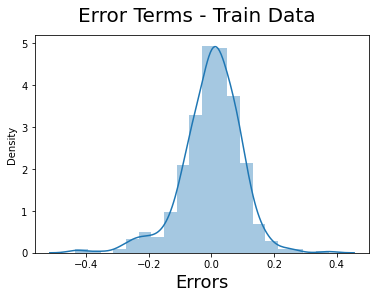

In [53]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms - Train Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

##### The error terms plot shows that the error terms are normally distributed, which confirms the assumption about linear regression.

Text(0, 0.5, 'y predicted')

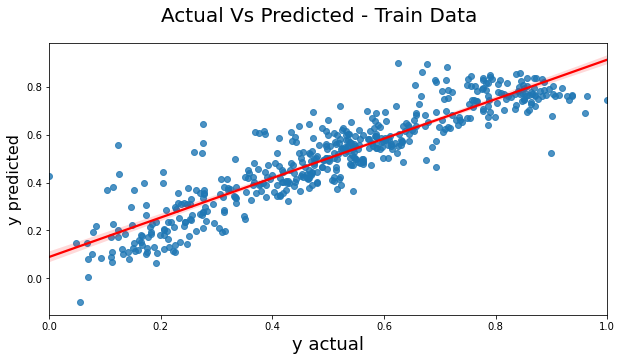

In [54]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,5))
sns.regplot(x=y_train, y=y_train_pred, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('Actual Vs Predicted - Train Data', fontsize = 20)              # Plot heading 
plt.xlabel('y actual', fontsize = 18)                          # X-label
plt.ylabel('y predicted', fontsize = 16) 

#### The variance of the error terms are not high from the fitted line and appears to be linear.

## Step 8: Making predictions using final model

### Applying scaling on test data

In [55]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

test[num_vars] = scaler.transform(test[num_vars])

test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
637,1,0,0,0.571511,0.564409,0.599828,0.243845,0.790037,0,0,...,0,1,0,0,1,0,0,0,0,0
305,0,0,1,0.373321,0.392549,0.739075,0.104712,0.479061,0,0,...,0,0,0,0,0,0,0,1,0,0
606,1,0,1,0.810668,0.746492,0.607113,0.091619,0.884837,0,0,...,0,0,0,0,0,1,0,0,0,0
580,1,0,0,0.925816,0.879215,0.630677,0.566238,0.782559,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,0,0.295817,0.299829,0.641388,0.353482,0.380695,0,0,...,1,0,0,0,1,0,0,0,0,0


In [56]:
test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Spring,season_Summer,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.511416,0.036530,0.616438,0.547916,0.523530,0.629939,0.395522,0.535483,0.237443,0.296804,...,0.077626,0.077626,0.146119,0.168950,0.178082,0.155251,0.100457,0.146119,0.009132,0.305936
std,0.501015,0.188034,0.487367,0.240049,0.216250,0.147360,0.206915,0.215590,0.426491,0.457896,...,0.268194,0.268194,0.354034,0.375566,0.383458,0.362974,0.301297,0.354034,0.095344,0.461858
min,0.000000,0.000000,0.000000,-0.049680,-0.026641,0.193231,-0.052405,0.047055,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.349516,0.346192,0.519923,0.256105,0.390474,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.563760,0.546542,0.628535,0.371475,0.533709,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.762504,0.708229,0.750214,0.499177,0.698746,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.016608,0.951509,0.948586,1.224196,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### We can see that the max value is little just more or less than 1.0. So we can deduce that the scaling has been done on test data

### Deriving X and y data from Test data

In [57]:
y_test = test.pop('cnt')
X_test = test

In [58]:
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_Spring,season_Summer,season_Winter,...,mnth_October,mnth_September,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thrusday,weekday_Tuesday,weekday_Wednesday,weathersit_Light_Snow_Rain,weathersit_Mist_Cloudy
637,1,0,0,0.571511,0.564409,0.599828,0.243845,0,0,1,...,0,1,0,0,1,0,0,0,0,0
305,0,0,1,0.373321,0.392549,0.739075,0.104712,0,0,1,...,0,0,0,0,0,0,0,1,0,0
606,1,0,1,0.810668,0.746492,0.607113,0.091619,0,0,0,...,0,0,0,0,0,1,0,0,0,0
580,1,0,0,0.925816,0.879215,0.630677,0.566238,0,0,0,...,0,0,0,1,0,0,0,0,0,0
302,0,0,0,0.295817,0.299829,0.641388,0.353482,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [59]:
y_test.head()

637    0.790037
305    0.479061
606    0.884837
580    0.782559
302    0.380695
Name: cnt, dtype: float64

### Extracting only required columns from test based on model 7 (final model)

In [60]:
# predicting using values used by the final model
test_col = X_train_lm.columns
X_test=X_test[test_col[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 637 to 550
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   const                       219 non-null    float64
 1   yr                          219 non-null    int64  
 2   temp                        219 non-null    float64
 3   windspeed                   219 non-null    float64
 4   season_Spring               219 non-null    uint8  
 5   season_Winter               219 non-null    uint8  
 6   mnth_July                   219 non-null    uint8  
 7   mnth_November               219 non-null    uint8  
 8   weathersit_Light_Snow_Rain  219 non-null    uint8  
 9   weathersit_Mist_Cloudy      219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(6)
memory usage: 9.8 KB


### Making predictions from the final model

In [61]:
y_pred = lm.predict(X_test)

## Step 9: Model Evaluation

### R-Square for test data

In [62]:
# R-square value for test

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8101228278233135

##### Based on the r2_score of the test data, which is 0.81 which is close to r2 score of train data (0.824). Hence we can say that the error variance is similar on test and training data there by the assumption of homoscedasticity is confirmed.

### MSE (Mean Squared Error)

In [63]:
mse = mean_squared_error(y_test, y_pred)
mse

0.008785026350675369

### Error terms - Test data

Text(0.5, 0, 'Errors')

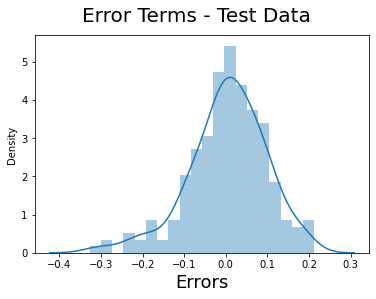

In [64]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error Terms - Test Data', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

##### The error terms plot shows that the error terms are normally distributed, which confirms the assumption about linear regression.

### Plotting Actual vs Predicted Values

Text(0, 0.5, 'y predicted')

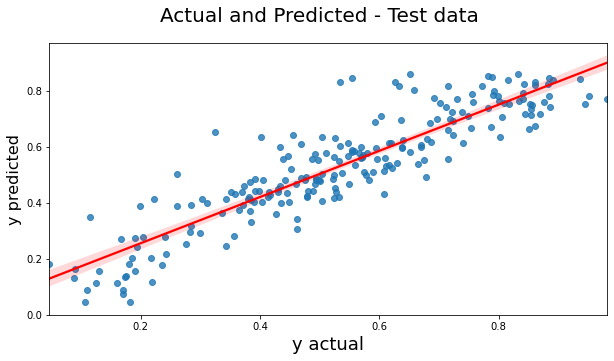

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure(figsize=(10,5))
sns.regplot(x=y_test, y=y_pred, fit_reg=True, line_kws={"color": "red"})
fig.suptitle('Actual and Predicted - Test data', fontsize = 20)              # Plot heading 
plt.xlabel('y actual', fontsize = 18)                          # X-label
plt.ylabel('y predicted', fontsize = 16) 

###### We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes. 

### Plotting Actual and Predicted values

Text(0, 0.5, 'Counts')

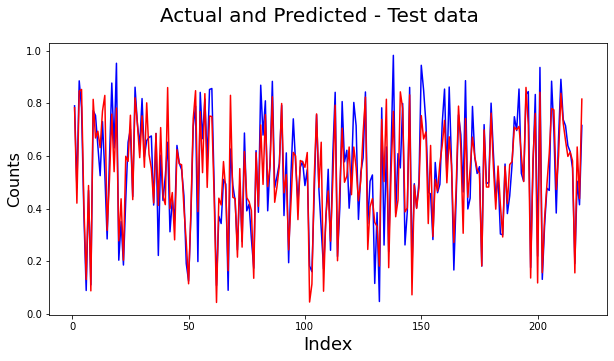

In [66]:
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(10,5))
plt.plot(c,y_test, color="blue", linestyle="-")
plt.plot(c,y_pred, color="red", linestyle="-")
fig.suptitle('Actual and Predicted - Test data', fontsize=20)              
plt.xlabel('Index', fontsize=18)                              
plt.ylabel('Counts', fontsize=16) 

##### Predictions are close to the actual values as evident from the above graph.

### Plotting Error terms

Text(0, 0.5, 'Counts - Predicted Counts')

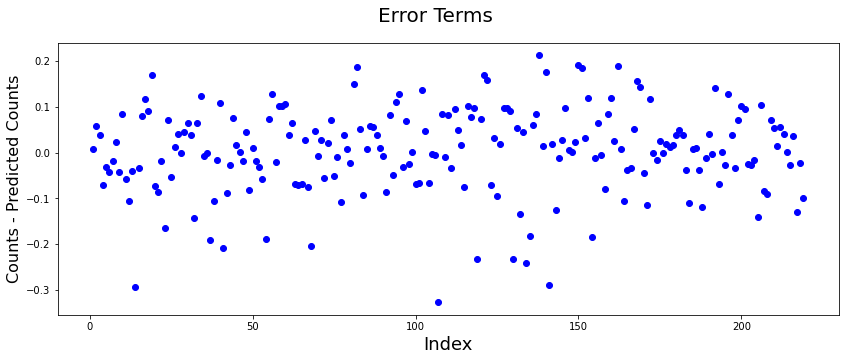

In [67]:
c = [i for i in range(1,220)]
fig = plt.figure(figsize=(14,5))
plt.plot(c, y_test-y_pred, color="blue", marker = 'o', linestyle = "")
fig.suptitle('Error Terms', fontsize=20)              
plt.xlabel('Index', fontsize=18)                      
plt.ylabel('Counts - Predicted Counts', fontsize=16)    

##### As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

# Inference

### Building the equation for best fitted line

In [68]:
param = pd.DataFrame(lm.params)
param.insert(0,'Variables',param.index)
param.rename(columns = {0:'Coefficient value'},inplace = True)
param['index'] = list(range(0,10))
param.set_index('index',inplace = True)
param.sort_values(by = 'Coefficient value',ascending = False,inplace = True)
param

,Variables,Coefficient value
index,,
2,temp,0.440705
0,const,0.259397
1,yr,0.237897
5,season_Winter,0.056439
7,mnth_November,-0.050021
6,mnth_July,-0.072246
9,weathersit_Mist_Cloudy,-0.082611
3,windspeed,-0.093784
4,season_Spring,-0.117980


### We can see that the equation of our best fitted line is:
#### cnt = 0.259397 + (0.440705 * temp) + (0.237897 * yr) + (0.056439 * season_Winter) - (0.050021 * mnth_Nov) - (0.072246 * mnth_Jul) - (0.082611 * weathersit_Mist_Cloudy) - (0.093784 * windspeed) - (0.117980 * season_Spring) - (0.250884 * weathersit_Light_Snow_Rain)

##### All the positive coefficients like temp, yr, season_Winter indicate that an increase in these values will lead to an increase in the value of cnt.

##### All the negative coefficients  indicate that an increase in these values will lead to an decrease in the value of cnt.

- Temp is the most significant with the largest coefficient and with increase in temp, cnt will increase.
- Followed by season winter which influence demand (cnt) in positive way. However Spring season is predicted to have least demand.
- Bike rentals is less for the month of november and july.
- The rentals reduce Mist and Cloudy weather and Light Snow and Rain weather patterns.
- Windspeed also has negative impact on the demand.


This indicates that the bike rentals is majorly affected by temperature, season, month, weather conditions and windspeed.